In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        break
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
! pip3 install torchsummary
from torchsummary import summary

In [2]:
train = pd.read_csv("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train.csv")
train

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
0,50a418190bc3fb1ef1633bf9678929b3,No finding,14,R11,NaN,NaN,NaN,NaN
1,21a10246a5ec7af151081d0cd6d65dc9,No finding,14,R7,NaN,NaN,NaN,NaN
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
3,051132a778e61a86eb147c7c6f564dfe,Aortic enlargement,0,R10,1264.0,743.0,1611.0,1019.0
4,063319de25ce7edb9b1c6b8881290140,No finding,14,R10,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
67909,936fd5cff1c058d39817a08f58b72cae,No finding,14,R1,NaN,NaN,NaN,NaN
67910,ca7e72954550eeb610fe22bf0244b7fa,No finding,14,R1,NaN,NaN,NaN,NaN
67911,aa17d5312a0fb4a2939436abca7f9579,No finding,14,R8,NaN,NaN,NaN,NaN
67912,4b56bc6d22b192f075f13231419dfcc8,Cardiomegaly,3,R8,771.0,979.0,1680.0,1311.0


In [3]:
train[train['image_id'] == '9a5094b2563a1ef3ff50dc5c7ff71345']

,image_id,class_name,class_id,rad_id,x_min,y_min,x_max,y_max
2,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R10,691.0,1375.0,1653.0,1831.0
5517,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural effusion,10,R9,1789.0,1729.0,1875.0,1992.0
25023,9a5094b2563a1ef3ff50dc5c7ff71345,Pleural thickening,11,R9,1789.0,1729.0,1875.0,1992.0
26165,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R9,692.0,1375.0,1657.0,1799.0
42709,9a5094b2563a1ef3ff50dc5c7ff71345,Cardiomegaly,3,R8,689.0,1313.0,1666.0,1763.0
53473,9a5094b2563a1ef3ff50dc5c7ff71345,Aortic enlargement,0,R9,1052.0,715.0,1299.0,966.0


In [4]:
import pydicom

dicom = pydicom.dcmread("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/train/68335ee73e67706aa59b8b55b54b11a4.dicom")
dicom

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 156
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Digital X-Ray Image Storage - For Presentation
(0002, 0003) Media Storage SOP Instance UID      UI: 68335ee73e67706aa59b8b55b54b11a4
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.3.4
(0002, 0013) Implementation Version Name         SH: ''
(0002, 0016) Source Application Entity Title     AE: 'VITREA1'
-------------------------------------------------
(0010, 0040) Patient's Sex                       CS: 'O'
(0028, 0002) Samples per Pixel                   US: 1
(0028, 0004) Photometric Interpretation          CS: 'MONOCHROME1'
(0028, 0010) Rows                                US: 2836
(0028, 0011) Columns                             US: 2336
(0028, 0030) Pixel Spacing            

In [5]:
image = dicom.pixel_array
image
# 픽셀 값 범위가 다르므로, 표준화 해준다.

array([[4017, 3984, 3999, ..., 4040, 4046, 4042],
       [4020, 3982, 3997, ..., 4041, 4045, 4043],
       [4023, 3987, 3998, ..., 4039, 4045, 4042],
       ...,
       [4052, 4044, 4046, ..., 4069, 4078, 4070],
       [4050, 4044, 4045, ..., 4069, 4077, 4066],
       [4050, 4043, 4047, ..., 4069, 4076, 4063]], dtype=uint16)

In [6]:
dicom.pixel_array.shape

(2836, 2336)

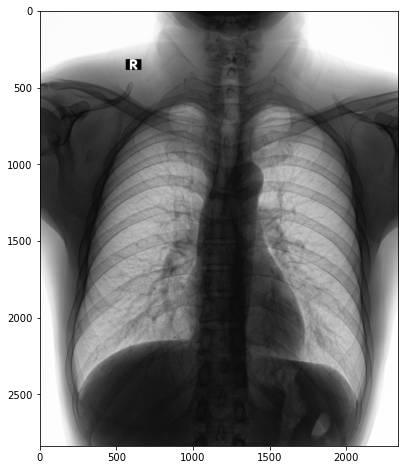

In [7]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.imshow(dicom.pixel_array, cmap = 'gray')
plt.show();

In [8]:
display(np.stack([image, image, image]), np.stack([image, image, image]).shape)

array([[[4017, 3984, 3999, ..., 4040, 4046, 4042],
        [4020, 3982, 3997, ..., 4041, 4045, 4043],
        [4023, 3987, 3998, ..., 4039, 4045, 4042],
        ...,
        [4052, 4044, 4046, ..., 4069, 4078, 4070],
        [4050, 4044, 4045, ..., 4069, 4077, 4066],
        [4050, 4043, 4047, ..., 4069, 4076, 4063]],

       [[4017, 3984, 3999, ..., 4040, 4046, 4042],
        [4020, 3982, 3997, ..., 4041, 4045, 4043],
        [4023, 3987, 3998, ..., 4039, 4045, 4042],
        ...,
        [4052, 4044, 4046, ..., 4069, 4078, 4070],
        [4050, 4044, 4045, ..., 4069, 4077, 4066],
        [4050, 4043, 4047, ..., 4069, 4076, 4063]],

       [[4017, 3984, 3999, ..., 4040, 4046, 4042],
        [4020, 3982, 3997, ..., 4041, 4045, 4043],
        [4023, 3987, 3998, ..., 4039, 4045, 4042],
        ...,
        [4052, 4044, 4046, ..., 4069, 4078, 4070],
        [4050, 4044, 4045, ..., 4069, 4077, 4066],
        [4050, 4043, 4047, ..., 4069, 4076, 4063]]], dtype=uint16)

(3, 2836, 2336)

In [9]:
sample = np.stack([image, image, image])
print(sample.shape)
sample.transpose(1,2,0).shape

(3, 2836, 2336)


(2836, 2336, 3)

In [10]:
from torch.utils.data import Dataset, DataLoader
import cv2

# 다른 weight 로 먼저 제출해보자.

class VinBigDataset(Dataset):
    def __init__(self, dataframe, image_dir, transforms = None):
        super().__init__()
        self.image_ids = dataframe['image_id'].unique()
        self.df = dataframe
        self.image_dir = image_dir
        self.transforms = transforms
        
    def __getitem__(self, index):
        image_id = self.image_ids[index]
        dicom = pydicom.dcmread(f'{self.image_dir}/{image_id}.dicom') # 이미지 가져올 때 3채널로 가져오지 않는다.
        image = dicom.pixel_array
        image = np.stack([image, image, image])
        image = image.astype('float32')
        image = image - image.min() # 최솟값이 0 이 아니므로 최솟값을 0 으로
        image = image/image.max()
        image = image.transpose(1,2,0)
        
        if self.transforms:
            sample = {
                'image':image,
            }
            sample = self.transforms(**sample)
            image = sample['image']
            
            return image, image_id
        
    def __len__(self):
        return self.image_ids.shape[0]

In [11]:
sub = pd.read_csv("/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/sample_submission.csv")

In [12]:
image_dir = '/kaggle/input/vinbigdata-chest-xray-abnormalities-detection/test'

In [13]:
import albumentations as A
from albumentations.pytorch import ToTensorV2

def get_test_transform():
    return A.Compose([ToTensorV2()])

In [14]:
test_dataset = VinBigDataset(sub, image_dir, transforms = get_test_transform())

def collate_fn(batch):
    return tuple(zip(*batch))

test_dataloader = DataLoader(test_dataset,
                             batch_size = 8,
                             shuffle = False,
                             num_workers = 4,
                             collate_fn = collate_fn)

In [20]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
import torch

model = fasterrcnn_resnet50_fpn(pretrained=False, pretrained_backbone=False)

num_classes = 15
in_features = model.roi_heads.box_predictor.cls_score.in_features
# 학습 1024, 추론 91
model.roi_heads.box_predictor = FastRCNNPredictor(in_features ,num_classes)

In [23]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
WEIGHT = '../input/vinbigdata-public/model_state_epoch_7.pth'
model.load_state_dict(torch.load(WEIGHT, map_location = device))
model.eval()
model.to(device)

FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256)
          (relu): ReLU(inplace=True)
          (downsample)

In [25]:
def format_prediction_string(labels, boxes, scores):
    pred_strings = []
    for j in zip(labels, scores, boxes):
        pred_strings.append(f"{j[0]} {j[1]:.4f} {j[2][0]} {j[2][1]} {j[2][2]} {j[2][3]}")
    return " ".join(pred_strings)

In [27]:
%%time

detection_threshold = 0.5
results = []

with torch.no_grad():
    for images, image_ids in test_dataloader:
        
        images = list(image.to(device) for image in images)
        outputs = model(images)
        
        for i, image in enumerate(images):
            
            image_id = image_ids[i]
            
            result = {
                'image_id' : image_id,
                'PredictionString' : '14 1.0 0 0 1 1'
            }
            
            boxes = outputs[i]['boxes'].data.cpu().numpy()
            labels = outputs[i]['labels'].data.cpu().numpy()
            scores = outputs[i]['scores'].data.cpu().numpy()
            
            if len(boxes) > 0:
                selected = scores >= detection_threshold
                boxes = boxes[selected].astype(np.int32)
                labels = labels[selected]
                scores = scores[selected]
                
                if len(boxes) > 0:
                    result = {
                        'image_id' : image_id,
                        'PredictionString' : format_prediction_string(labels, boxes, scores)
                    }
            results.append(result)
            print('doing...........')

/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "
/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (12-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "
/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "
/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handle

doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing.........

/opt/conda/lib/python3.7/site-packages/pydicom/pixel_data_handlers/pillow_handler.py:177: UserWarning: The (0028,0101) 'Bits Stored' value (14-bit) doesn't match the JPEG 2000 data (16-bit). It's recommended that you change the 'Bits Stored' value
  f"The (0028,0101) 'Bits Stored' value ({ds.BitsStored}-bit) "


doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing.........

doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing.........

doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing.........

doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing.........

doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing.........

doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing...........
doing.........

In [29]:
sub = pd.DataFrame(results)
sub

,image_id,PredictionString
0,002a34c58c5b758217ed1f584ccbcfe9,14 1.0 0 0 1 1
1,004f33259ee4aef671c2b95d54e4be68,1 0.9240 1259 583 1536 871 4 0.8580 1013 1447 ...
2,008bdde2af2462e86fd373a445d0f4cd,14 1.0 0 0 1 1
3,009bc039326338823ca3aa84381f17f1,4 0.6922 680 1058 1565 1335
4,00a2145de1886cb9eb88869c85d74080,14 1.0 0 0 1 1
...,...,...
2995,ff91fb82429a27521bbec8569b041f02,1 0.9085 1624 624 1883 929 4 0.8608 1278 1410 ...
2996,ff9fcc4087ed5e941209aa3fa948e364,14 1.0 0 0 1 1
2997,ffaa288c8abca300974f043b57d81521,11 0.5212 1929 1596 2322 2074 4 0.5159 967 151...
2998,ffc441e0c8b7153844047483a577e7c3,14 1.0 0 0 1 1


In [30]:
sub.to_csv("submission.csv", index=0)

In [ ]:
# 예측 , 과제
# torchsummary

In [ ]:
# 0.037